# Predicting the functionality of water points in Tanzania using machine learning

## Data Modelling

## Introduction
Random Forest and XGBoost are both ensemble learning techniques used in machine learning. Random Forest is an ensemble of decision trees, where each tree is constructed independently. XGBoost (Extreme Gradient Boosting) is also an ensemble of decision trees, but it builds trees sequentially and optimizes for errors in previous trees.

In [47]:
# importing libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('clean_data.csv') #taking data to df

In [225]:
df.head()

,Unnamed: 0,status_group,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,0,2011/03/14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,1,0,2013/03/06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,2,0,2013/02/25,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,3,2,2013/01/28,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,4,0,2011/07/13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others


In [226]:
pd.options.display.max_columns=100 # to see all columns

In [227]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True ) # dropping unnecessary columns

In [228]:
df1= df.copy()
df1.head()
#at the next steps maybe we can decide not to drop some columns so df assigned another dataframe to protect original

,status_group,date_recorded,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,2011/03/14,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,2013/03/06,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,2013/02/25,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,2013/01/28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,2011/07/13,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others


In [229]:
df1.drop(columns=['lga','ward'],inplace=True ) # dropping lga and ward which has same information with regions

In [230]:
df1.drop(columns=['date_recorded'],inplace=True ) #drop this column for now

In [231]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #converting from T/F to 0-1

In [232]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #converting from T/F to 0-1

In [233]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [234]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [235]:
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

We saw our target labels again that;

* 0 = functional
* 1 = functional but needs repair
* 2 = non-functional

In [236]:
# assign target
target='status_group'

## Making Pipeline / Baseline

X = df1[used_cols]: This line creates a new DataFrame X by selecting the columns specified in the used_cols list from the original DataFrame df1. These columns are the features that will be used for training a machine learning model.

y = df1[target]: This line creates a Series y by selecting the column specified by the target variable from the original DataFrame df1. This column contains the target variable or the labels you want to predict with your machine learning model.

In [237]:
#prepocessing
# seperate columns to X,y 
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

## Data partition

In [238]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The data was split into test and training set. Training set is 80% and test set is 20%

We will create empty dataframe to write our results on it to keep when parameters changed.

In [239]:
df_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info']) # to see all results

## Robust Scaler/ Target Encoder

The Robust Scaler is a method for feature scaling, which means it is used to scale numerical features so that they have similar scales. The Target Encoder is used for encoding categorical features into numerical values based on the mean of the target variable. It can be helpful when you have categorical features that are not ordinal.

To scale numeric values and encode categorical columns, we will make pipeline and also use it in our model and classifier changes. We use Robust Scaler as a scaler. Robust scales variables using statistics that are strong to outliers. Robust Scaler use IQR(Interquartile Range). As a encoder, we use target encoder which works well with higher cardinality features.

In [240]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

## Random forest

In [241]:
rf_norm = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')

pipe = make_pipeline(preprocessor,rf_norm)

pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9955176767676768
TEST: 0.806986531986532

Balanced Accuracy:
TRAIN: 0.9950631546057003
TEST: 0.6782350749219345


In [242]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.678 , 
       'train_balanced_acc' : 0.995,
               'info' : ''}, ignore_index=True)

## XGBoost

In [243]:
xgb_norm = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.01)

pipe = make_pipeline(preprocessor,xgb_norm)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7985900673400673
TEST: 0.781986531986532

Balanced Accuracy:
TRAIN: 0.6015703481946003
TEST: 0.5873907587533934


In [244]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.587, 
       'train_balanced_acc' : 0.602,
               'info' : ''}, ignore_index=True)

## Hyperparameter tuning

## Grid search for RF

In [143]:
df2=df1.copy() #taking copy of dataframe

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

for c in cat_col:
    # Fit and transform the column with label encoding
    df2[str(c) + '_encoded'] = label_encoder.fit_transform(df2[c])
    df2.drop(columns=c, inplace=True)
    
# dividing our X and y and train-test splits

used_cols1 = [c for c in df2.columns.tolist() if c not in [target]]
X1=df2[used_cols1]
y1=df2[target]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [161]:
# setting grid search parameters and fit and run them
para = {"n_estimators": [20, 50, 100],
          "criterion": ["gini", "entropy"],
          "max_features": ['sqrt', 'log2'],}

grid_search = GridSearchCV(rf_norm, para, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy')

In [162]:
# Best score of grid search
grid_search.best_score_

0.8006944444444443

In [163]:
# best hyperparameters
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

## Grid search for XGBoost

In [167]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.75],
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(xgb_norm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.4, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='merror', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=10,
                                     max_leaves=None, maximize=False,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.75],
                         'max_depth': [3, 4, 5], 'n_estimators': [20, 50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [168]:
# Best score of grid search
grid_search.best_score_

0.791077441077441

In [169]:
# best hyperparameters
grid_search.best_params_

{'learning_rate': 0.75, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

## Random Forest with gridsearch

In [245]:
# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10, class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9208543771043771
TEST: 0.7941077441077441

Balanced Accuracy:
TRAIN: 0.9343715633057011
TEST: 0.7072134861862599


In [246]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.707 , 
       'train_balanced_acc' : 0.934,
               'info' : 'gridsearch best param'}, ignore_index=True)

## XGBoost

In [247]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', n_estimators=100,
                    max_features= 5, min_samples_split= 10,
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.75, subsample= 1.0)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9481271043771043
TEST: 0.8053030303030303

Balanced Accuracy:
TRAIN: 0.899975727988247
TEST: 0.6766922592813588


In [248]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.677, 
       'train_balanced_acc' : 0.900,
               'info' : 'gridsearch best param'}, ignore_index=True)

## SMOTE

To use SMOTE with scaler and encoder takes too much time. So, we will encode and scale our dataframe and change it. To protect the original one, we assign it to new df.

In [250]:
df4=df1.copy()# assign to protect original one 
df4.head()

,status_group,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,1,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,1,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,250,1,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,1,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,281,1,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others


In [251]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    df4[str(c) + '_encoded'] = encoder.fit_transform(df4[c].values, df4[target])
    df4.drop(columns=c, inplace=True) 

In [252]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df4[col])),columns=[col])
    return df

scaled_df = scaleColumns(df4,[num_col])

In [253]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [254]:
# Making over-sampling

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data
smt = SMOTE(sampling_strategy='auto', n_jobs=-1, random_state=42)
X_train_sampled, y_train_sampled = smt.fit_resample(X_train, y_train)

# Check the class distribution in the training set
print(y_train.value_counts())
print(y_train_sampled.value_counts())

0    25802
2    18252
1     3466
Name: status_group, dtype: int64
0    25802
2    25802
1    25802
Name: status_group, dtype: int64


## Random Forest with SMOTE

In [255]:
# setting classifier
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')


rf_smote.fit(X_train_sampled, y_train_sampled)


# predictions of training set
y_pred = rf_smote.predict(X_train_sampled)

# predictions of test set
y_pred_test = rf_smote.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train_sampled, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train_sampled, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9502105779913702
TEST: 0.796043771043771

Balanced Accuracy:
TRAIN: 0.9502105779913702
TEST: 0.7012380219564639


[]

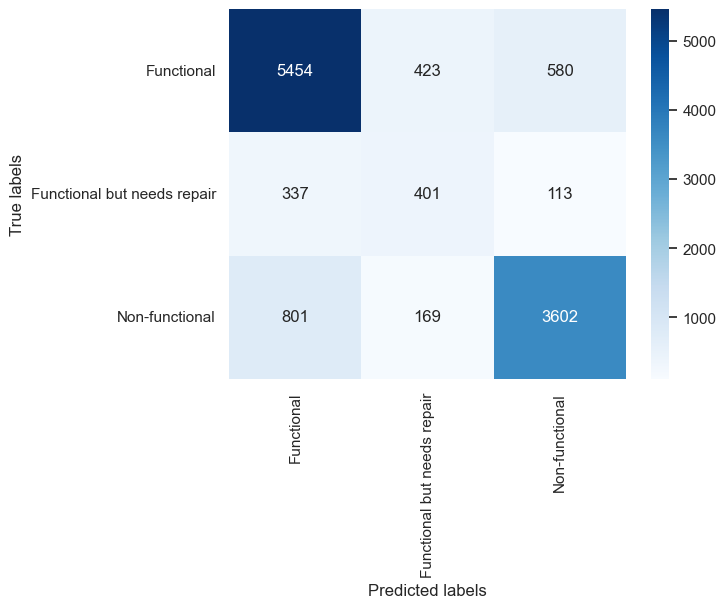

In [256]:
class_label=['Functional', 'Functional but needs repair', 'Non-functional']
cm = confusion_matrix(y_test, y_pred_test)


sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_label, yticklabels=class_label, cmap=plt.cm.Blues)

# Set labels for the x and y axes
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.plot()

In [257]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.701 , 
       'train_balanced_acc' : 0.950,
               'info' : 'with SMOTE'}, ignore_index=True)

Feature ranking:
1. feature 1 (0.126792) - longitude
2. feature 13 (0.124799) - quantity_encoded
3. feature 2 (0.121130) - latitude
4. feature 9 (0.059269) - extraction_type_group_encoded
5. feature 0 (0.057951) - gps_height
6. feature 11 (0.053292) - payment_encoded
7. feature 15 (0.051585) - waterpoint_type_encoded
8. feature 14 (0.051144) - source_encoded
9. feature 18 (0.046657) - funder_cat_encoded
10. feature 4 (0.045681) - population
11. feature 16 (0.045009) - decade_encoded
12. feature 17 (0.044396) - installer_cat_encoded
13. feature 8 (0.040405) - region_encoded
14. feature 3 (0.038506) - district_code
15. feature 10 (0.030783) - management_encoded
16. feature 7 (0.030741) - basin_encoded
17. feature 12 (0.014215) - water_quality_encoded
18. feature 6 (0.010266) - permit
19. feature 5 (0.007380) - public_meeting


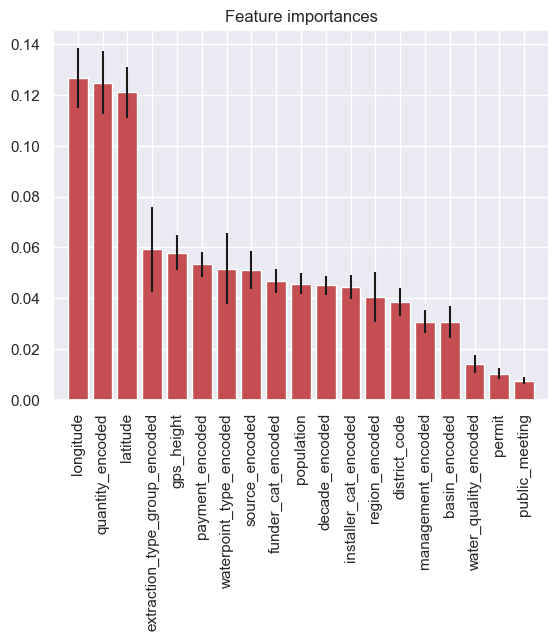

In [258]:
feature_names = X.columns

importances = rf_smote.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking with names
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)  # Display feature names on x-axis
plt.xlim([-1, X.shape[1]])
plt.show()

## XGBoost with SMOTE

In [259]:
# setting classifier
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', n_estimators=100,
                    max_features= 5, min_samples_split= 10,
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.75)


xgb_smote.fit(X_train_sampled, y_train_sampled)


# predictions of training set
y_pred = xgb_smote.predict(X_train_sampled)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train_sampled, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train_sampled, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9532335994625739
TEST: 0.7860269360269361

Balanced Accuracy:
TRAIN: 0.9532335994625739
TEST: 0.6938825734267834


[]

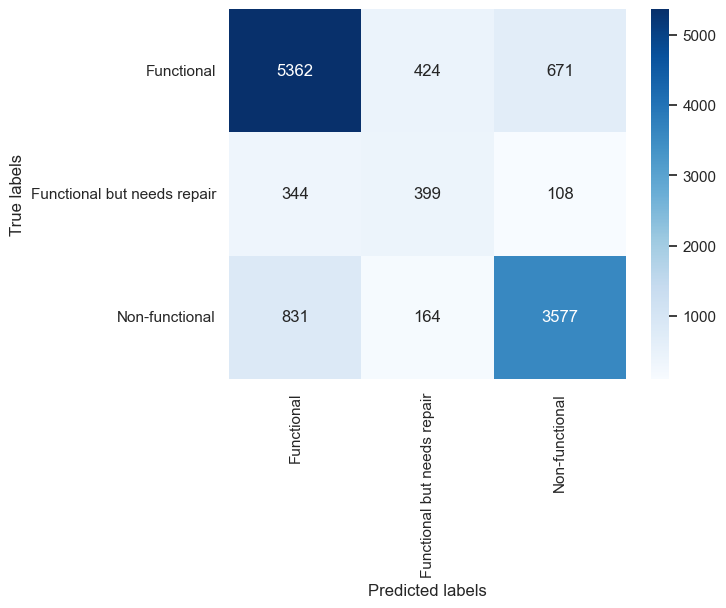

In [260]:
class_label1=['Functional', 'Functional but needs repair', 'Non-functional']
cm = confusion_matrix(y_test, y_pred_test)


sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_label1, yticklabels=class_label1, cmap=plt.cm.Blues)

# Set labels for the x and y axes
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.plot()

In [261]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.694 , 
       'train_balanced_acc' : 0.953,
               'info' : 'with SMOTE'}, ignore_index=True)

## Conclusion

In [262]:
df_results

,Model,test_balanced_acc,train_balanced_acc,info
0,RandomForest,0.678,0.995,
1,XGBoost,0.587,0.602,
2,RandomForest,0.707,0.934,gridsearch best param
3,XGBoost,0.677,0.900,gridsearch best param
4,RandomForest,0.701,0.950,with SMOTE
5,XGBoost,0.694,0.953,with SMOTE
